## Question 1

### Step 1- 3

In [505]:
#Step 1 - Importing the necessary libraries
import pandas as pd
import numpy as np


#Step 2,3 - Importing and assigning to a variable
users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='\t')

#Renaming the the original columns
users = users.rename(columns={'user_id|age|gender|occupation|zip_code': 'temp'}, index={'ONE': 'Row_1'})

#Creating Columns and split the data in the columns
users[['user_id', 'age', 'gender', 'occupation', 'zip_code']] = users.temp.str.split("|", expand = True)

users.drop(columns =['temp'], inplace = True) #deletes/removes the original renamed column

users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Step 4

In [506]:
users['age'] = users['age'].astype(int) #Converting string data into integer

users.groupby('occupation').mean() 

,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


## Step 5

In [518]:
#Creating a pivot table indexed by occupation and using gender as columns.
percentage = users.pivot_table(index='occupation', columns='gender',  aggfunc='size', fill_value=0)

#Storing the pivot table in a variable
sumGender = percentage[['F', 'M']].sum(axis=1)

#Creating a new column to store the values of M - Men and rounding up the values to 2 decimal place
percentage['Male Ratio'] = (percentage['M'])/sumGender
percentage['Male Ratio'] = percentage['Male Ratio'].round(decimals=2)     

percentage.sort_values(by='Male Ratio', ascending=False).head()

gender,F,M,Male Ratio
occupation,,,
doctor,0,7,1.00
engineer,2,65,0.97
technician,1,26,0.96
retired,1,13,0.93
executive,3,29,0.91


### Step 6

In [515]:
users.groupby(['occupation']).min('age').head() #Minimum age per occupation

,age
occupation,
administrator,21
artist,19
doctor,28
educator,23
engineer,22


In [516]:
users.groupby(['occupation']).max('age').head() #Maximum age per occupation

,age
occupation,
administrator,70
artist,48
doctor,64
educator,63
engineer,70


### Step 7

In [11]:
users.groupby(['occupation','gender']).mean().head() #Mean age by gender for per occupation

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429

### Step 8

In [508]:
#Note: If code show error, kindly rerun it step by step from the STEP1 due to dependency of variables

#Creating a pivot table indexed by occupation and using gender as columns.
percentage = users.pivot_table(index='occupation', columns='gender',  aggfunc='size', fill_value=0)

#Storing the pivot table in a variable
sumGender = percentage[['F', 'M']].sum(axis=1)

#Creating a new column to store the values of M - Men and rounding up the values to 1 decimal place
percentage['% of Men'] = (100 * percentage['M'])/sumGender
percentage['% of Men'] = percentage['% of Men'].round(decimals=1)     

#Creating a new column to store the values of F - Women and rounding up the values to 1 decimal place
percentage['% of Women'] = (100 * percentage['F'])/sumGender
percentage['% of Women'] = percentage['% of Women'].round(decimals=1)  

percentage.sort_values(by='% of Men', ascending=False).head()

gender,F,M,% of Men,% of Women
occupation,,,,
doctor,0,7,100.0,0.0
engineer,2,65,97.0,3.0
technician,1,26,96.3,3.7
retired,1,13,92.9,7.1
programmer,6,60,90.9,9.1


## Question 2 

### Step 1-3

In [18]:
#step 1 - Importing the necessary libraries
import pandas as pd
import numpy as np

#Step 2,3 -Importing and assigning to a variable
euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')

euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### Step 4

In [20]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5

In [25]:
print('The total Number of teams that participated in Euro 2012 is {}'. format(euro12['Team'].count()))

The total Number of teams that participated in Euro 2012 is 16


### Step 6

In [26]:
print('The number of columns in this dataset is {} '.format(len(euro12.columns)))

The number of columns in this dataset is 35 


### Step 7

In [28]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']].copy() #Used copy() function to select the required columns
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8

In [31]:
indexedTeam = euro12.set_index('Team')

#Sorting the teams
indexedTeam.sort_values(by=['Red Cards', 'Yellow Cards']).head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
Germany,10,32,32,47.8%,15.6%,80,2,1,0,2,...,10,62.6%,63,49,12,4,0,15,15,17
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
Ukraine,2,7,26,21.2%,6.0%,38,0,0,0,2,...,13,76.5%,48,31,4,5,0,9,9,18


### Step 9

In [33]:
print('The mean Yellow cards given per Team is {}'.format(euro12['Yellow Cards'].mean()))

The mean Yellow cards given per Team is 7.4375


### Step 10

In [34]:
filteredTeams = euro12[(euro12['Goals']>6)]

filteredTeams

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11

In [35]:
filteredTeams = euro12[(euro12['Team'].str.startswith('G'))]

filteredTeams

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12

In [36]:
euro12[euro12.columns[0:7]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13

In [37]:
euro12[euro12.columns[0:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14

In [39]:
filteredTeams = euro12[(euro12['Team'].str.contains('England|Italy|Russia'))]

filteredTeams[['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Question 3

### Step 1-2

In [42]:
#Step 1 - Importing the necessary libraries
import pandas as pd
import numpy as np

#Step 2
seriesOne = pd.Series(np.random.randint(1,5, size=100), name = 'seriesOne')

seriesTwo = pd.Series(np.random.randint(1,4, size=100), name = 'seriesTwo')

seriesThree = pd.Series(np.random.randint(10000,30001, size=100),name = 'seriesThree')

### Step 3

In [43]:
DataFrame = pd.concat([seriesOne, seriesTwo, seriesThree], axis = 1)

DataFrame.head()

,seriesOne,seriesTwo,seriesThree
0,3,2,28020
1,1,2,20608
2,2,3,12803
3,1,3,22125
4,1,3,17489


### Step 4

In [44]:
DataFrame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
DataFrame.head()

,bedrs,bathrs,price_sqr_meter
0,3,2,28020
1,1,2,20608
2,2,3,12803
3,1,3,22125
4,1,3,17489


### Step 5

In [47]:
bigcolumn = pd.DataFrame(columns = ['bigcolumn'])

#Using apply() function to call the lambda function - applying changes to every row and joining columns from Dataframe seperated by commas
    
bigcolumn['bigcolumn'] = DataFrame[DataFrame.columns[0:]].apply(lambda x: ', '.join(x.astype(str)),axis=1)
                        
bigcolumn

,bigcolumn
0,"3, 2, 28020"
1,"1, 2, 20608"
2,"2, 3, 12803"
3,"1, 3, 22125"
4,"1, 3, 17489"
...,...
95,"2, 2, 25967"
96,"2, 3, 18586"
97,"1, 2, 27857"
98,"3, 2, 22990"


### Step 6

In [52]:
print('Yes, It is')

Yes, It is


### Step 7

In [53]:
bigcolumn['bigcolumn'] = bigcolumn['bigcolumn'].astype(str)

#USing the stack() function to restructure the dataframe then reset the index
bigcolumn = bigcolumn.drop('bigcolumn', axis=1).join(bigcolumn['bigcolumn'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('bigcolumn'))

#Resetting Indexing a second time to be organized from 0 to 299
bigcolumn = bigcolumn.reset_index(drop=True)

bigcolumn


,bigcolumn
0,3
1,2
2,28020
3,1
4,2
...,...
295,2
296,22990
297,2
298,3


## Question 4 

### Step 1- 4

In [25]:
#step 1 - Importing the necessary libraries
import pandas as pd
import numpy as np
import datetime

#Step 2,3 - Importing and assigning to a variable
data = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', sep='\t')

#Renaming the the original column
data = data.rename(columns={'Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL': 'temp'}, index={'ONE': 'Row_1'})

#Creating Columns and split the data in the columns
data[['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']] = data.temp.str.split(expand=True)

data.drop(columns =['temp'], inplace = True) #deletes/removes the original renamed column

data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [26]:
#Converting date columns to a single datetime column, by first changing the Yr into integer
data['Yr'] = data['Yr'].astype(int)
data['Yr'] = data.apply(lambda x: x['Yr']+1900,axis=1)
data['Yr'] = data['Yr'].astype(str)

data['Date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))

data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05


### Step 5

In [27]:
#Verifying the datatype to confirm datetime64[ns]
data.dtypes

Yr              object
Mo              object
Dy              object
RPT             object
VAL             object
ROS             object
KIL             object
SHA             object
BIR             object
DUB             object
CLA             object
MUL             object
CLO             object
BEL             object
MAL             object
Date    datetime64[ns]
dtype: object

In [28]:
data = data.set_index('Date')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,,
1961-01-01,1961,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,1961,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,1961,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,1961,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,1961,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,1978,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,1978,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,1978,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6

In [29]:
#Converting the data to numbers
data[['Yr','Mo','Dy','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']] = data[['Yr','Mo','Dy','RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].apply(pd.to_numeric, errors='coerce')

#Finding the missing values using isna() funtion
print('The total number of missing values is {}'.format(data.isna().sum().sum()))

The total number of missing values is 31


### Step 7

In [30]:
#Getting the total number of values
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      6574 non-null   int64  
 1   Mo      6574 non-null   int64  
 2   Dy      6574 non-null   int64  
 3   RPT     6568 non-null   float64
 4   VAL     6571 non-null   float64
 5   ROS     6572 non-null   float64
 6   KIL     6569 non-null   float64
 7   SHA     6572 non-null   float64
 8   BIR     6574 non-null   float64
 9   DUB     6571 non-null   float64
 10  CLA     6572 non-null   float64
 11  MUL     6571 non-null   float64
 12  CLO     6573 non-null   float64
 13  BEL     6574 non-null   float64
 14  MAL     6570 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 821.8 KB


In [38]:
#Getting non-missing values by finding the difference between total entries and missing values (data.isna())
print('The total non-missing values are {}'.format(6574-data.isna().sum().sum()))

The total non-missing values are 6543


### Step 8

In [32]:
#Calculating mean for each location
data[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].mean()

RPT    12.362987
VAL    10.644314
ROS    11.660526
KIL     6.306468
SHA    10.455834
BIR     7.092254
DUB     9.797343
CLA     8.495053
MUL     8.493590
CLO     8.707332
BEL    13.121007
MAL    15.599079
dtype: float64

In [34]:
print('The mean windspeeds of the windspeeds is {}' .format(data[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].mean().mean()))

The mean windspeeds of the windspeeds is 10.227982360836924


### Step 9

In [36]:
#Utilitzing the describe() function on the data and assign the result to the DataFrame
loc_stats = data[['RPT','VAL','ROS','KIL','SHA','BIR','DUB','CLA','MUL','CLO','BEL','MAL']].describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### Step 10

In [43]:
#By using transpose() function to provide the values for each of day
day_stats = pd.DataFrame.transpose(data)
day_stats.describe()

Date,1961-01-01,1961-01-02,1961-01-03,1961-01-04,1961-01-05,1961-01-06,1961-01-07,1961-01-08,1961-01-09,1961-01-10,...,1978-12-22,1978-12-23,1978-12-24,1978-12-25,1978-12-26,1978-12-27,1978-12-28,1978-12-29,1978-12-30,1978-12-31
count,14.000000,14.000000,14.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,150.442857,149.192857,149.504286,136.362000,139.637333,137.792000,139.574667,139.723333,139.318000,139.848667,...,139.734000,146.690667,142.925333,138.916667,139.618667,147.833333,146.653333,146.512000,146.960667,147.055333
std,521.138056,521.493581,521.406085,504.781236,503.877109,504.385915,503.895729,503.856918,503.964911,503.821465,...,508.564616,506.632662,507.709452,508.802552,508.612811,506.357269,506.711433,506.705578,506.580837,506.558027
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.460000,9.500000,4.790000,0.750000,1.960000,8.080000,5.000000,8.710000,9.130000,9.590000
25%,9.965000,8.170000,7.877500,4.270000,7.375000,5.685000,7.770000,7.620000,7.915000,8.435000,...,5.210000,12.895000,7.290000,4.685000,3.435000,13.605000,10.710000,11.270000,12.290000,11.605000
50%,12.875000,10.435000,11.210000,5.830000,10.920000,7.500000,9.290000,9.620000,10.000000,9.710000,...,7.580000,16.500000,11.710000,6.580000,6.960000,15.590000,14.330000,14.420000,14.040000,12.080000
75%,15.020000,13.527500,12.740000,9.605000,12.420000,10.315000,13.645000,12.625000,11.705000,11.625000,...,11.500000,20.000000,12.185000,10.355000,11.980000,17.600000,19.920000,19.025000,19.895000,21.205000
max,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,1961.000000,...,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000


### Step 12

In [44]:
data.resample('Y').sum().head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,,
1961-12-31,715765,2382,5738,4427.85,3747.35,4124.54,2511.92,3950.08,2821.35,3523.68,3215.74,3130.45,3580.15,4928.52,4952.44
1962-12-31,716130,2382,5738,4457.88,3690.31,4282.44,2533.60,3890.14,2698.47,4022.56,3209.72,3035.64,3531.83,4719.70,5213.92
1963-12-31,716495,2382,5738,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964-12-31,718824,2384,5767,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965-12-31,717225,2382,5738,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95


### Step 13

In [45]:
data.resample('M').sum().head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,,
1961-01-31,60791,31,496,445.24,359.65,416.38,239.84,321.11,266.23,346.73,277.36,281.66,313.33,430.31,455.80
1961-02-28,54908,56,406,455.54,419.31,389.92,249.23,387.86,306.25,332.94,331.69,331.00,356.00,520.33,431.53
1961-03-31,60791,93,496,326.70,350.19,333.34,218.52,325.79,274.87,298.97,304.72,298.53,348.81,508.74,471.60
1961-04-30,58830,120,465,321.68,282.83,299.94,174.92,253.05,194.85,207.76,212.84,220.27,217.11,334.42,308.35
1961-05-31,60791,155,496,305.69,265.50,335.36,177.16,294.20,203.82,228.12,253.49,249.22,263.48,368.91,372.36


### Step 14

In [46]:
data.resample('7D').sum().head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,,
1961-01-01,13727,7,28,98.87,74.13,78.96,48.30,56.70,47.63,76.81,42.33,60.62,61.60,89.25,91.25
1961-01-08,13727,7,77,86.20,62.85,79.58,35.95,53.70,39.67,64.54,48.53,44.49,57.83,86.96,86.88
1961-01-15,13727,7,126,94.88,72.83,92.71,44.50,54.31,49.55,57.92,54.92,48.43,55.00,65.41,76.87
1961-01-22,13727,7,175,128.87,94.96,115.21,73.67,104.82,89.60,96.08,92.91,86.24,97.03,129.68,144.25
1961-01-29,13727,11,100,95.79,115.38,90.92,63.64,103.36,71.41,93.47,64.55,76.84,73.04,106.47,92.26


## Question 5

### Step 1-4

In [113]:
#Step 1 - Importing the necessary libraries
import pandas as pd
import numpy as np

#Step 2,3 - Importing and assigning to a variable
chipo = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

#Step 4 - Show first 10 entries
chipo[0:10]

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5

In [117]:
len(chipo)

4622

### Step 6

In [116]:
len((chipo.columns))

5

### Step 7

In [63]:
colnames=list(chipo)
print(colnames)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


### Step 8

In [64]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9, 10

In [65]:
chipo.groupby(['item_name']).sum().sort_values('quantity', ascending=False).head()

the most ordered item is "Chicken Bowl" and it was ordered 761 times


,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [77]:
print("The most ordered item is Chicken Bowl")

The most ordered item is Chicken Bowl


In [78]:
print("Chicken Bowl was ordered 761 times")

Chicken Bowl was ordered 761 times


### Step 11

In [79]:
chipo.groupby(['choice_description']).sum().sort_values('quantity', ascending=False).head()

,order_id,quantity
choice_description,,
[Diet Coke],123455,159
[Coke],122752,143
[Sprite],80426,89
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",43088,49
"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]",36041,42


In [75]:
print("The most ordered item in the choice_description column is Diet Coke")

The most ordered item in the choice_description column is Diet Coke


### Step 12

In [110]:
chipo['quantity'].sum(axis = 0)

4972

### Step 13

In [118]:
#NOTE: If you get errors running this, please run STEP 1, then run it again
tempDataFrame = chipo['item_price'].str.split('$', n = 1, expand = True) #Creating a temporary DataFrame
  
chipo['$$']= tempDataFrame[0]
chipo['amount']= tempDataFrame[1]

#Removing the additional columns
chipo.drop(columns =['$$'], inplace = True)
chipo.drop(columns =['item_price'], inplace = True)

chipo.rename(columns = {'amount':'item_price'}, inplace = True)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [96]:
chipo['item_price'] = chipo['item_price'].astype(float)

chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

### Step 14

In [109]:
chipo['revenue']= chipo['item_price']*chipo['quantity']

chipo['revenue'].sum()

39237.02

### Step 15

In [108]:
chipo['order_id'].count()

4622

### Step 16

In [107]:
chipo['revenue'].sum()/chipo['order_id'].count()

8.48918649935093

### Step 17 

In [120]:
len(chipo.groupby(['item_name']))

50

## Question 6

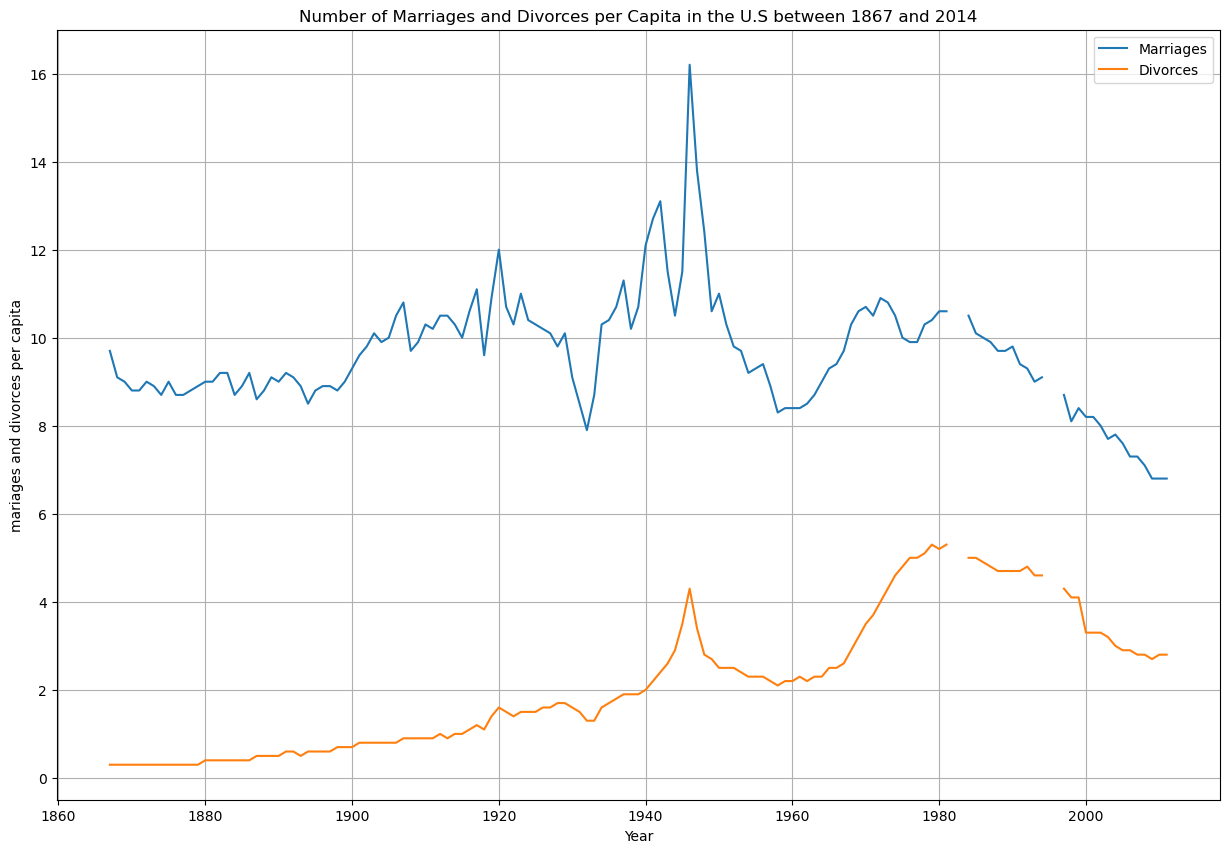

In [501]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

marriages = pd.read_csv('us-marriages-divorces-1867-2014.csv')
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(marriages['Year'], marriages['Marriages_per_1000'], label="Marriages")
ax.plot(marriages['Year'], marriages['Divorces_per_1000'], label="Divorces")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('mariages and divorces per capita')
ax.set_title('Number of Marriages and Divorces per Capita in the U.S between 1867 and 2014')
ax.legend()
ax.grid(True)

plt.show()

## Questiion 7

In [314]:
#Creating a new dataframe
marriagesDF = pd.DataFrame(columns = ['Year', 'Marriages', 'Divorces','Population', 'Marriages_per_1000', 'Divorces_per_1000'])

#Adding the subset data into the new dataframe
marriagesDF = marriagesDF.append(marriages[(marriages.Year == 1900)])
marriagesDF = marriagesDF.append(marriages[(marriages.Year == 1950)])
marriagesDF = marriagesDF.append(marriages[(marriages.Year == 2000)])

marriagesDF

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
33,1900,709000.0,56000.0,76094000,9.3,0.7
83,1950,1667000.0,385000.0,151684000,11.0,2.5
133,2000,2315000.0,944000.0,282398000,8.2,3.3


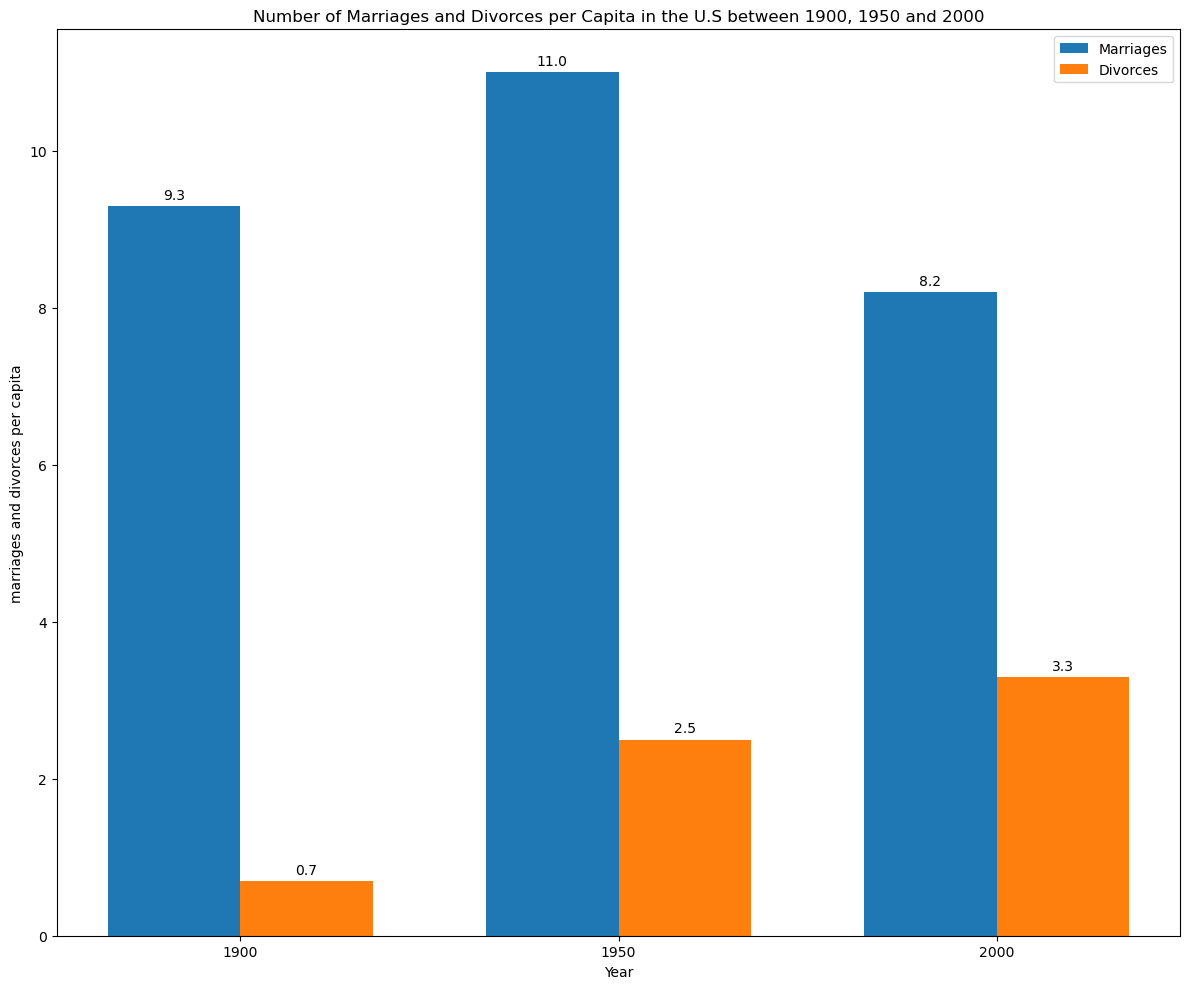

In [502]:
#reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = marriagesDF['Year']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 10))

# create trace1 
rects1 = ax.bar(x - width/2, marriagesDF['Marriages_per_1000'], width, label='Marriages')
# create trace2 
rects2 = ax.bar(x + width/2, marriagesDF['Divorces_per_1000'], width, label='Divorces')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('marriages and divorces per capita')
ax.set_title('Number of Marriages and Divorces per Capita in the U.S between 1900, 1950 and 2000')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Question 8

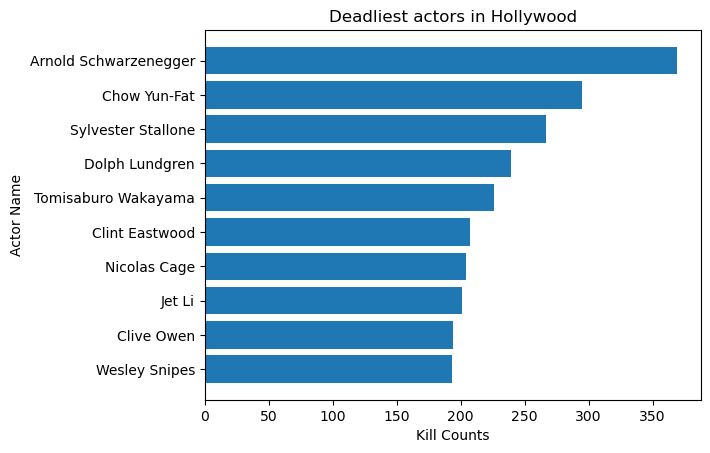

In [367]:
#reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py

import matplotlib.pyplot as plt
import numpy as np

actorList = pd.read_csv('actor_kill_counts.csv') 
actorList = actorList.sort_values('Count')          
actorList = actorList.reset_index(drop=True) 

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
actorNames = actorList['Actor']
y_pos = np.arange(len(actorNames))
performance = actorList['Count']

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(actorNames)

ax.set_ylabel('Actor Name')
ax.set_xlabel('Kill Counts')
ax.set_title('Deadliest actors in Hollywood')

plt.show()

## Question 9

In [259]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt, legend

romanEmp = pd.read_csv('roman-emperor-reigns.csv')          #Read CSV file

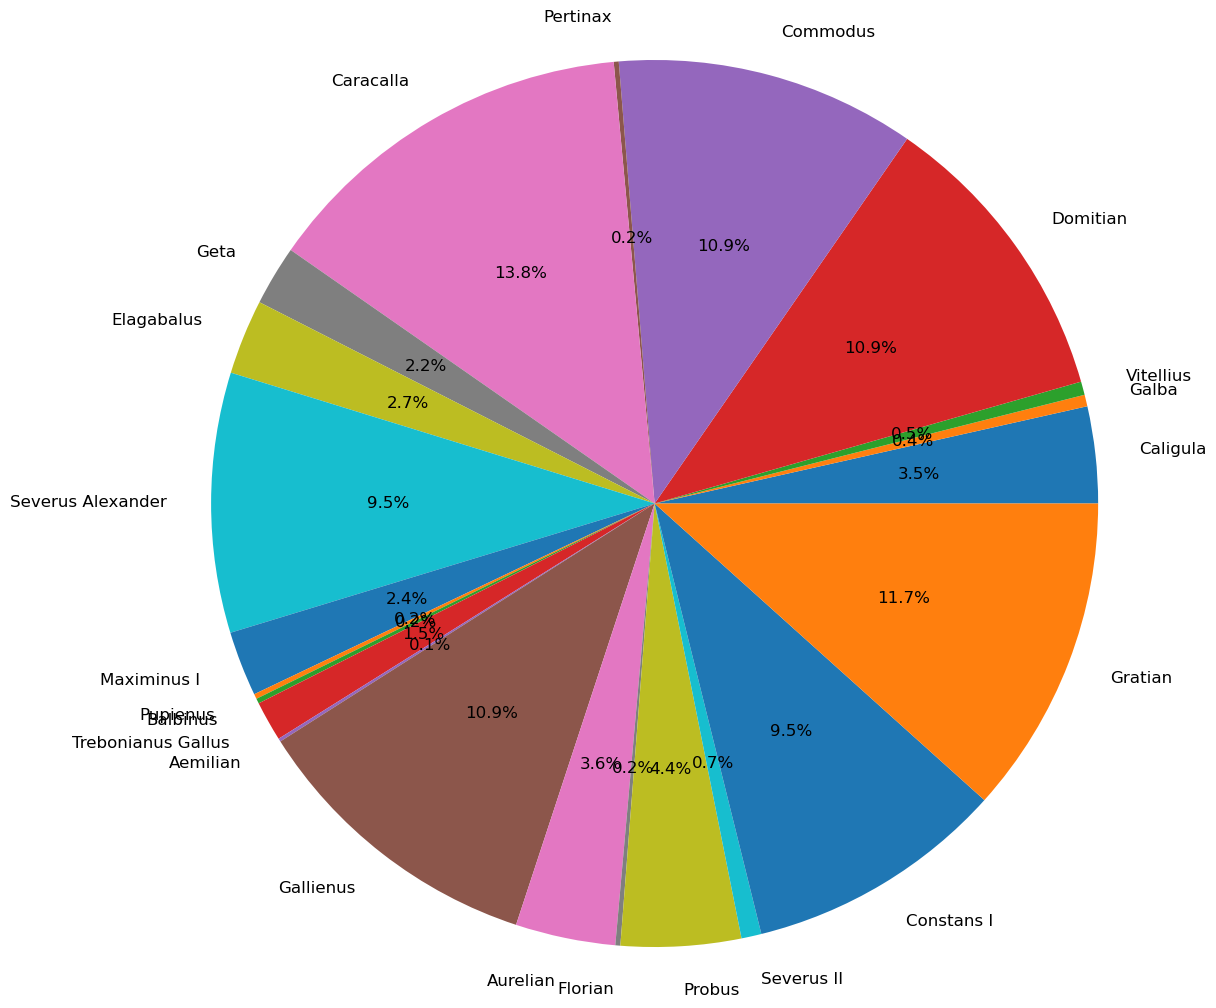

In [353]:
romanEmp=romanEmp[(romanEmp.Cause_of_Death == 'Assassinated')]
frac = romanEmp['Length_of_Reign']
plt.pie(frac, labels =romanEmp['Emperor'], autopct='%1.1f%%', textprops={'size': 'large'}, radius=3)
plt.show()

## Question 10

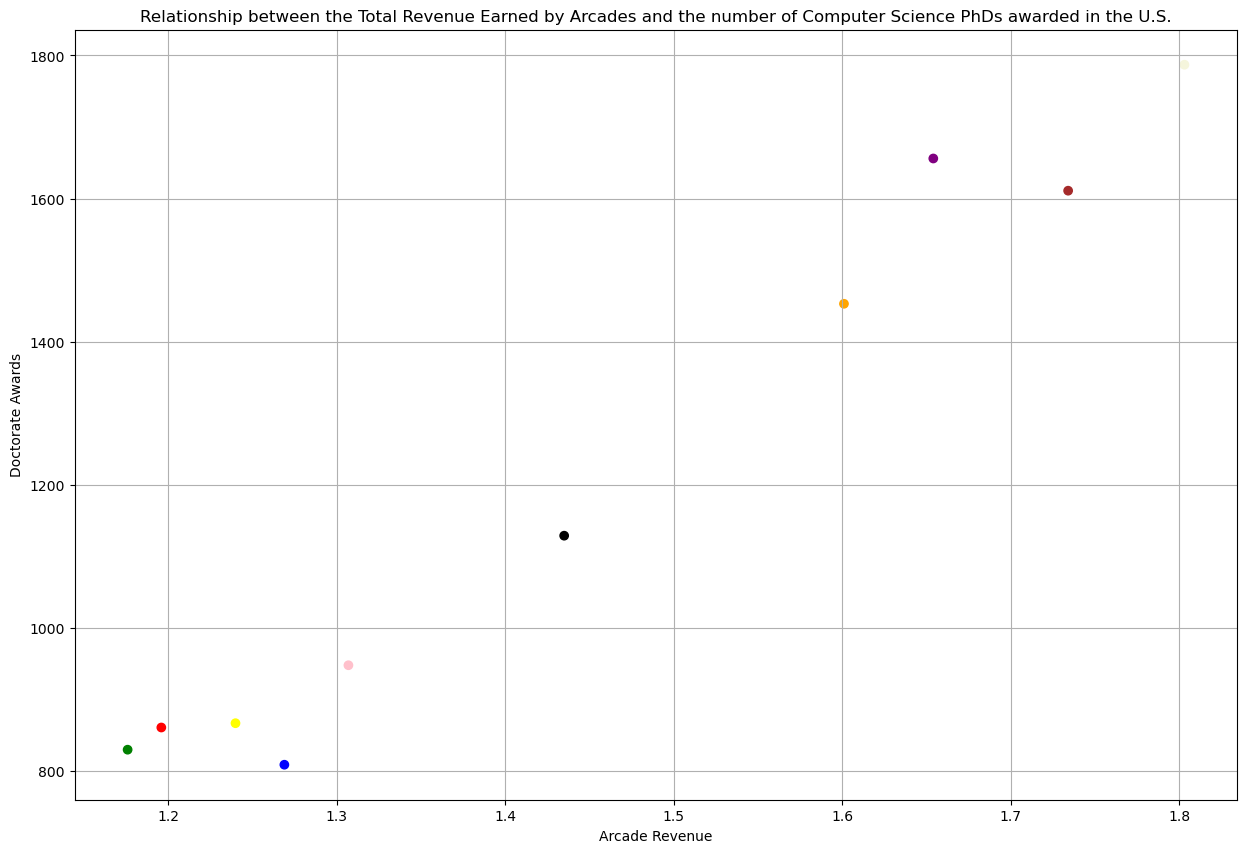

In [500]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


arcade = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')          #Read the CSV file

Years = arcade['Year']

fig, az = plt.subplots(figsize=(15, 10))


colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown"])

scatter=az.scatter(arcade['Total Arcade Revenue (billions)'], arcade['Computer Science Doctorates Awarded (US)'], c=colors)


#Adding some text for labels, title and custom x-axis tick labels, etc.
az.set_xlabel('Arcade Revenue')
az.set_ylabel('Doctorate Awards')
az.set_title('Relationship between the Total Revenue Earned by Arcades and the number of Computer Science PhDs awarded in the U.S.')
az.grid(True)

plt.show()